In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
CC=pd.read_csv("CocaCola_Sales_Rawdata - Sheet1.csv")
CC.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [3]:
CC.shape

(42, 2)

In [4]:
CC['quarters']= 0

In [7]:
for i in range(42):
    p = CC["Quarter"][i]
    CC['quarters'][i]= p[0:3]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
Quarter_dummies = pd.DataFrame(pd.get_dummies(CC['quarters']))

In [13]:
CC1 = pd.concat([CC,Quarter_dummies],axis = 1)
CC1.head()

,Quarter,Sales,quarters,Q1_,Q2_,Q3_,Q4_
0,Q1_86,1734.827000,Q1_,1,0,0,0
1,Q2_86,2244.960999,Q2_,0,1,0,0
2,Q3_86,2533.804993,Q3_,0,0,1,0
3,Q4_86,2154.962997,Q4_,0,0,0,1
4,Q1_87,1547.818996,Q1_,1,0,0,0


In [14]:
CC1["t"] = np.arange(1,43)
CC1.head()

,Quarter,Sales,quarters,Q1_,Q2_,Q3_,Q4_,t
0,Q1_86,1734.827000,Q1_,1,0,0,0,1
1,Q2_86,2244.960999,Q2_,0,1,0,0,2
2,Q3_86,2533.804993,Q3_,0,0,1,0,3
3,Q4_86,2154.962997,Q4_,0,0,0,1,4
4,Q1_87,1547.818996,Q1_,1,0,0,0,5


In [15]:
CC1["t_squared"] = CC1["t"]*CC1["t"]
CC1.columns
CC1.head()

,Quarter,Sales,quarters,Q1_,Q2_,Q3_,Q4_,t,t_squared
0,Q1_86,1734.827000,Q1_,1,0,0,0,1,1
1,Q2_86,2244.960999,Q2_,0,1,0,0,2,4
2,Q3_86,2533.804993,Q3_,0,0,1,0,3,9
3,Q4_86,2154.962997,Q4_,0,0,0,1,4,16
4,Q1_87,1547.818996,Q1_,1,0,0,0,5,25


In [21]:
CC1.quarters.unique()

array(['Q1_', 'Q2_', 'Q3_', 'Q4_'], dtype=object)

In [16]:
CC1["log_Sales"] = np.log(CC1["Sales"])
CC1.head()

,Quarter,Sales,quarters,Q1_,Q2_,Q3_,Q4_,t,t_squared,log_Sales
0,Q1_86,1734.827000,Q1_,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2_,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3_,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4_,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1_,1,0,0,0,5,25,7.344602


In [17]:
Train = CC1.head(40)
Test = CC1.tail(20)

In [18]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

409.60357490838715

In [19]:
Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

375.0590001177233

In [20]:
Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

366.0910330535524

In [23]:
add_sea = smf.ols('Sales~Q1_+Q2_+Q3_+Q4_',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1_', 'Q2_', 'Q3_', 'Q4_']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1115.608461596902

In [24]:
add_sea_Quad = smf.ols('Sales~t+t_squared+Q1_+Q2_+Q3_+Q4_',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1_', 'Q2_', 'Q3_', 'Q4_','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

164.30730783826448

In [25]:
Mul_sea = smf.ols('log_Sales~Q1_+Q2_+Q3_+Q4_',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1216.7560512045563

In [27]:
Mul_Add_sea = smf.ols('log_Sales~t+Q1_+Q2_+Q3_+Q4_',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

148.92228202494485

In [28]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,409.603575
1,rmse_Exp,375.059000
2,rmse_Quad,366.091033
3,rmse_add_sea,1115.608462
4,rmse_add_sea_quad,164.307308
5,rmse_Mult_sea,1216.756051
6,rmse_Mult_add_sea,148.922282


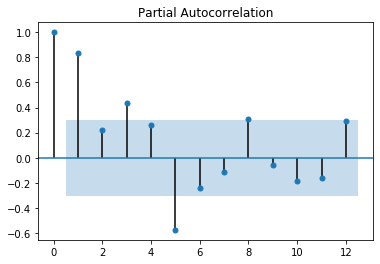

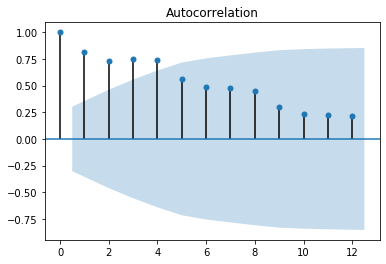

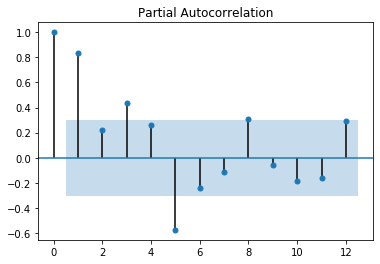

In [30]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(CC1.Sales,lags=12)
tsa_plots.plot_pacf(CC1.Sales,lags=12)

In [31]:
CC1.set_index('Quarter',inplace=True)

In [32]:
CC1.head()

,Sales,quarters,Q1_,Q2_,Q3_,Q4_,t,t_squared,log_Sales
Quarter,,,,,,,,,
Q1_86,1734.827000,Q1_,1,0,0,0,1,1,7.458663
Q2_86,2244.960999,Q2_,0,1,0,0,2,4,7.716443
Q3_86,2533.804993,Q3_,0,0,1,0,3,9,7.837477
Q4_86,2154.962997,Q4_,0,0,0,1,4,16,7.675529
Q1_87,1547.818996,Q1_,1,0,0,0,5,25,7.344602


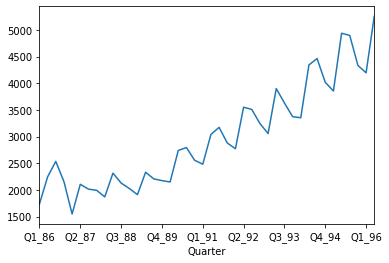

In [40]:
CC1['Sales'].plot()

In [39]:
p=1
q=0
d=1
pdq=[]
aic=[]
for q in range(12):
    try:
        model=ARIMA(CC.Sales,order=(p,d,q)).fit(disp=0)

        x=model.aic

        x1= p,d,q
               
        aic.append(x)
        pdq.append(x1)
    except:
        pass
            
keys = pdq
values = aic
d = dict(zip(keys, values))
print (d)


{(1, 1, 0): 618.8473071400956, (1, 1, 1): 608.7365920420494, (1, 1, 2): 607.9196281134793, (1, 1, 4): 582.3541746745109}


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
